In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding
from tensorflow.keras.models import Sequential
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('C:\\Users\\prana\\Documents\\Python data\\nlpemotions.csv')
data

,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


In [4]:
data.shape

(2000, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     2000 non-null   object
 1   Emotion  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [6]:
data['Emotion'].value_counts()

Emotion
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64

In [7]:
data.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
lm = LabelEncoder()

In [10]:
data['Emotion'] = lm.fit_transform(data['Emotion'])

In [11]:
data

,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,4
1,im updating my blog because i feel shitty,4
2,i never make her separate from me because i do...,4
3,i left with my bouquet of red and yellow tulip...,2
4,i was feeling a little vain when i did this one,4
...,...,...
1995,i just keep feeling like someone is being unki...,0
1996,im feeling a little cranky negative after this...,0
1997,i feel that i am useful to my people and that ...,2
1998,im feeling more comfortable with derby i feel ...,2


In [12]:
data['Emotion'].value_counts()

Emotion
2    695
4    581
0    275
1    224
3    159
5     66
Name: count, dtype: int64

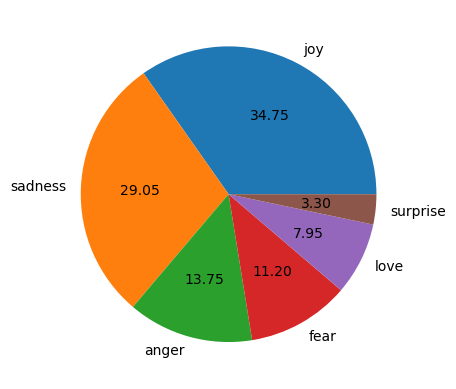

In [14]:
plt.pie(data['Emotion'].value_counts(), labels=['joy', 'sadness', 'anger', 'fear', 'love', 'surprise'], autopct='%0.2f')
plt.show()

In [16]:
texts = data['Text'].tolist()
labels = data['Emotion'].tolist()

In [20]:
texts

['im feeling rather rotten so im not very ambitious right now',
 'im updating my blog because i feel shitty',
 'i never make her separate from me because i don t ever want her to feel like i m ashamed with her',
 'i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived',
 'i was feeling a little vain when i did this one',
 'i cant walk into a shop anywhere where i do not feel uncomfortable',
 'i felt anger when at the end of a telephone call',
 'i explain why i clung to a relationship with a boy who was in many ways immature and uncommitted despite the excitement i should have been feeling for getting accepted into the masters program at the university of virginia',
 'i like to have the same breathless feeling as a reader eager to see what will happen next',
 'i jest i feel grumpy tired and pre menstrual which i probably am but then again its only been a week and im about as fit as a walrus on vacation for the summer',
 'i don t

In [21]:
tz = Tokenizer()
tz.fit_on_texts(texts)

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences=tz.texts_to_sequences(texts)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences,maxlen = max_length)

In [25]:
pd.DataFrame(sequences)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,16,7,254,488.0,14.0,16.0,25.0,46.0,2073.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16,1416,10,233.0,37.0,1.0,2.0,489.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,154,88,72.0,2074.0,50.0,15.0,37.0,1.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,156,21,10.0,2075.0,9.0,1077.0,3.0,1417.0,2076.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,18,7,6.0,57.0,334.0,36.0,1.0,134.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,27,232,7.0,13.0,143.0,19.0,67.0,2067.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,16,7,6,57.0,611.0,682.0,129.0,23.0,4793.0,4794.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,1,2,8,1.0,24.0,748.0,4.0,10.0,55.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,16,7,34,307.0,21.0,1720.0,1.0,2.0,30.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
max_length

61

In [27]:
padded_sequences

array([[   0,    0,    0, ..., 2073,   99,   60],
       [   0,    0,    0, ...,    1,    2,  489],
       [   0,    0,    0, ...,  391,   21,   72],
       ...,
       [   0,    0,    0, ...,    7,    9, 4795],
       [   0,    0,    0, ...,   43,   10, 4796],
       [   0,    0,    0, ...,    4,  333, 1415]])